In [1]:
import pandas as pd
housing = pd.read_csv('housing_sample.csv')
housing.head(3)

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500


In [2]:
mean_price = housing['SalePrice'].mean()
mean_price

180921.19589041095

In [3]:
price_sqft = (housing['SalePrice']/housing['GrLivArea']).mean()
price_sqft

120.57287807326834

In [4]:
grp_price = [housing.query('GrLivArea < 1500')['SalePrice'].mean(), 
             housing.query('1500 <= GrLivArea <= 2000')['SalePrice'].mean(),
             housing.query('GrLivArea > 2000')['SalePrice'].mean()]
grp_price

[139045.93222506394, 205017.30818965516, 281696.2429906542]

In [5]:
def model_1_simple_avg(sq_foot):
    return round(mean_price, -3)
def model_2_avg_ppsf(sq_foot):
    return round(price_per_sq_foot * sq_foot, -3)
def model_3_bin_avg(sq_foot):
    cat = 0 if sq_foot < 1500 else 1 if sq_foot <= 2000 else 2
    return round(group_price[cat], -3)

In [9]:
sq_feet = range(1000, 3500, 500)
models = [model_1_simple_avg, model_2_avg_ppsf, model_3_bin_avg]
data = {model.__name__: map(model, sq_feet) for model in models}
df_predictions = pd.DataFrame(data=data, index=sq_feet)
df_predictions

,model_1_simple_avg,model_2_avg_ppsf,model_3_bin_avg
1000,<map object at 0x0000017E2729B6D8>,<map object at 0x0000017E2729B668>,<map object at 0x0000017E2729B550>
1500,<map object at 0x0000017E2729B6D8>,<map object at 0x0000017E2729B668>,<map object at 0x0000017E2729B550>
2000,<map object at 0x0000017E2729B6D8>,<map object at 0x0000017E2729B668>,<map object at 0x0000017E2729B550>
2500,<map object at 0x0000017E2729B6D8>,<map object at 0x0000017E2729B668>,<map object at 0x0000017E2729B550>
3000,<map object at 0x0000017E2729B6D8>,<map object at 0x0000017E2729B668>,<map object at 0x0000017E2729B550>


In [1]:
import pandas as pd
housing = pd.read_csv('housing_sample.csv')
housing.head(3)

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500


In [15]:
mean_price = housing['SalePrice'].mean()
price_per_sq_foot = (housing['SalePrice'] / housing['GrLivArea']).mean()
group_price = [housing.query('GrLivArea < 1500')['SalePrice'].mean(),
               housing.query('1500 <= GrLivArea <= 2000')['SalePrice'].mean(),
               housing.query('GrLivArea > 2000')['SalePrice'].mean()]

def model_1_simple_avg(sq_foot):
    return round(mean_price, -3)

def model_2_avg_ppsf(sq_foot):
    return round(price_per_sq_foot * sq_foot, -3)

def model_3_bin_avg(sq_foot):
    cat = 0 if sq_foot < 1500 else 1 if sq_foot <= 2000 else 2
    return group_price[cat]

In [14]:
import numpy as np
def make_prediction(model, X):
    return np.array([model(x) for x in X])

In [17]:
X = [1200, 1800, 2750]

In [18]:
make_prediction(model_2_avg_ppsf, X)

array([145000., 217000., 332000.])

In [23]:
#backtesting on labelled data
X = housing['GrLivArea']
y_pred = make_prediction(model_2_avg_ppsf, X)
y_pred[:5]

array([206000., 152000., 215000., 207000., 265000.])

In [24]:
y = housing['SalePrice']
y[:5]

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_pred_vs_actual(model, n=20):
    housing_sample = housing.sample(n, random_state=123)
    X = housing_sample['GrLivArea']
    y = housing_sample['SalePrice']
    y_pred = make_prediction(model, X)
    
    fig, ax = plt.subplots(figsize=(12,5))
    ax.scatter(X, y, marker='o', label='Ground Truth')
    ax.scatter(X, y_pred, label='Prediction')
    ax.vlines(X, y, y_pred, linestyle='--', label='error')
    
    ax.set_title(f"Random {n} poins from {model.__name__}")
    ax.set_xlabel('Square Feet')
    ax.set_ylabel('Sale Price')
    ax.legend() 

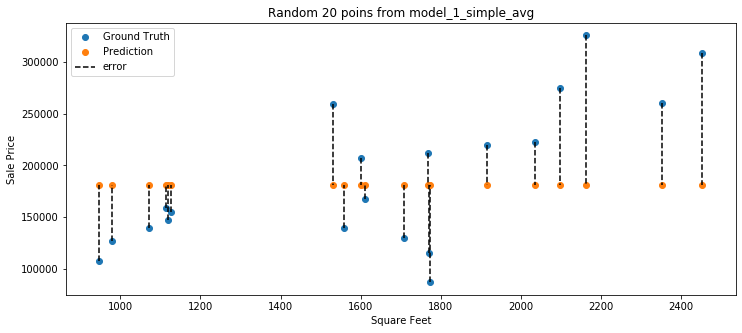

In [35]:
plot_pred_vs_actual(model_1_simple_avg)

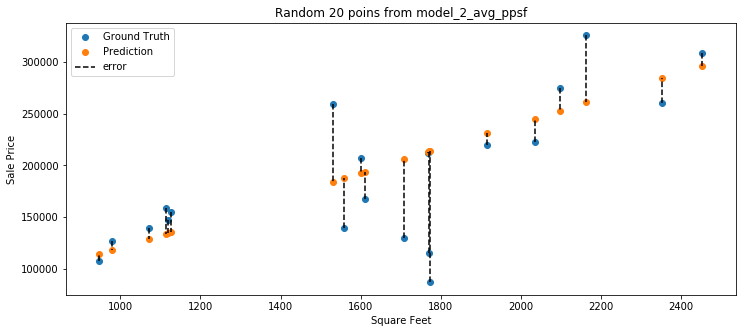

In [36]:
plot_pred_vs_actual(model_2_avg_ppsf)

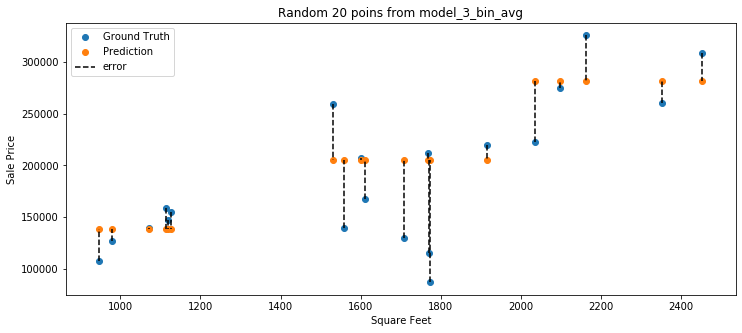

In [37]:
plot_pred_vs_actual(model_3_bin_avg)

In [47]:
#least square error
def sse(X, y, model):
    y_pred = make_prediction(model, X) 
    error = y - y_pred 
    squared_error = error ** 2 
    return squared_error.sum() 

In [50]:
X = housing['GrLivArea']
y = housing['SalePrice']
models = [model_1_simple_avg, model_2_avg_ppsf, model_3_bin_avg]
model_sse = pd.Series({model.__name__: sse(X, y, model) for model in models})
model_sse

model_1_simple_avg    9.207920e+12
model_2_avg_ppsf      4.662359e+12
model_3_bin_avg       5.393935e+12
dtype: float64

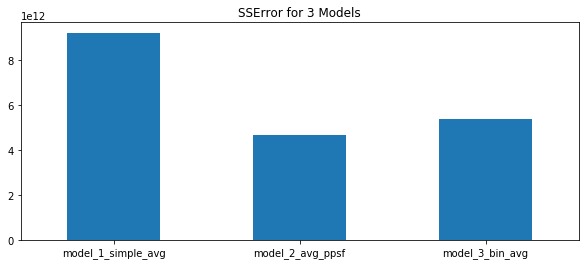

In [58]:
model_sse.plot(kind='bar', figsize=(10, 4), title='SSError for 3 Models', rot=0)

In [61]:
#another measure is root of the mean of squared errors
def rmse(X, y, model):
    y_pred = make_prediction(model, X)
    error = y - y_pred
    squared_error = error ** 2
    mse = squared_error.mean()
    return np.sqrt(mse)

In [62]:
model_rmse = pd.Series({model.__name__: rmse(X, y, model) for model in models})
model_rmse

model_1_simple_avg    79415.330985
model_2_avg_ppsf      56510.145963
model_3_bin_avg       60782.203726
dtype: float64

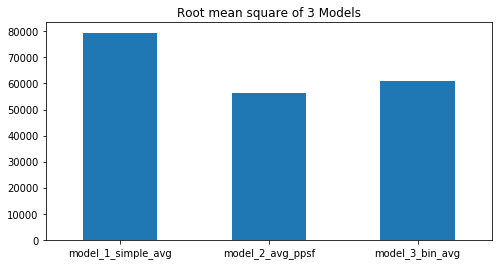

In [66]:
model_rmse.plot(kind='bar', figsize=(8, 4), title="Root mean square of 3 Models", rot=0)

In [72]:
def plot_errors(X, y, models, error_func):
    errors=pd.Series({model.__name__: error_func(X, y, model) for model in models})
    errors.plot(kind='bar', figsize=(8,4), title=error_func.__name__, rot=0)

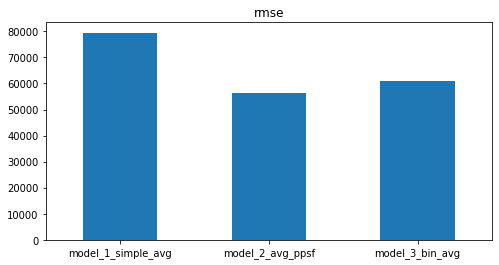

In [73]:
plot_errors(X, y, models, rmse)

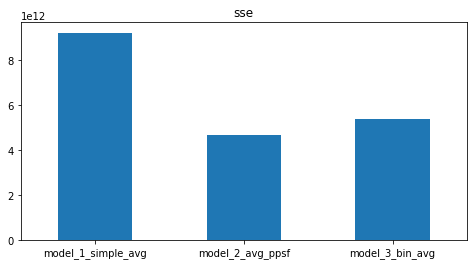

In [75]:
plot_errors(X, y, models, sse)

In [2]:
import pandas as pd
%matplotlib inline
housing = pd.read_csv('housing_sample.csv')
housing[:3]

,Neighborhood,Exterior1st,YearBuilt,LotFrontage,GrLivArea,GarageArea,BedroomAbvGr,FullBath,OverallQual,HeatingQC,SalePrice
0,CollgCr,VinylSd,2003,65.0,1710,548,3,2,7,Ex,208500
1,Veenker,MetalSd,1976,80.0,1262,460,3,2,6,Ex,181500
2,CollgCr,VinylSd,2001,68.0,1786,608,3,2,7,Ex,223500


In [4]:
housing.shape

(1460, 11)

In [5]:
housing.dtypes

Neighborhood     object
Exterior1st      object
YearBuilt         int64
LotFrontage     float64
GrLivArea         int64
GarageArea        int64
BedroomAbvGr      int64
FullBath          int64
OverallQual       int64
HeatingQC        object
SalePrice         int64
dtype: object

In [9]:
housing.isna().sum()

Neighborhood      0
Exterior1st       0
YearBuilt         0
LotFrontage     259
GrLivArea         0
GarageArea        0
BedroomAbvGr      0
FullBath          0
OverallQual       0
HeatingQC         0
SalePrice         0
dtype: int64